In [2]:
# Makes the display take up more of the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
import os
import torch as T
import numpy as np
import math
import pandas as pd
import cv2
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import itertools
import nb_files.nb_Utilities as util

In [4]:
util.set_seed(42)

In [5]:
#./AirSimNH.sh  -ResX=640 -ResY=480 -windowed

In [6]:
# turn off rewards except height

In [ ]:
# start at 0,0 learn to go to correct height 10secs just height reward
# start at 0,0 learn to sit at ~30m just height reward 15 seconds
# start at position 0 with no fly zone 0 fly episodes 30 seconds epsilon =1
# increase episode time to 40 seconds epsilon = 0.1
# increase episode time to 50 seconds epsilon = 0.1
# training on 60 second episodes was not working. 
# Changed to road follow to nonlinear reward reset epsilon to 0.5 

# train drone to get to correct height

In [7]:
i_lst=[]
Z_lst=[]
min_z=3; Z=30; Z_dec=0.99
for episode in range(300):
    if Z>min_z:
        Z=Z*Z_dec
    else:
        Z=min_z
    Z_lst.append(Z)
    i_lst.append(episode)
        

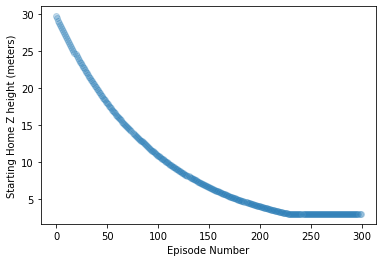

In [8]:
plt.plot(i_lst, Z_lst, 'o', alpha=0.25,)
plt.xlabel('Episode Number')
plt.ylabel('Starting Home Z height (meters)')
plt.show()

In [9]:
# turn off gps saving train for 301 episodes 
# eps_dec=1e-3
# min_z=3; Z=30; Z_dec=0.99
#if Z>min_z: Z=Z*Z_dec
#else: Z=min_z
#env.Newhome([0,0,-1*Z])

In [10]:
# Neighborhood_DDQNAgent_Just_Z-Reward_Low Successfully learned to go up. when it is too low.
# Trained for 32 episodes at 10 seconds a piece 
# behaving properly an episode score of -7 is expected

In [11]:
# add test results here:

In [12]:
# restart epsilon at 0.75 with z low model as base
# then slowly increase the height of home
# lr=0.0001,

In [13]:
i_lst=[]
Z_lst=[]
max_z=120; Z=30; Z_dec=1.01
for episode in range(300):
    high=np.random.choice([0,1], p=[0.1, 0.9])
    if high==1:
        if Z<max_z:
            Z=Z*Z_dec
        else:
            Z=max_z
        Z_lst.append(Z)
    else: Z_lst.append(7)
    i_lst.append(episode)

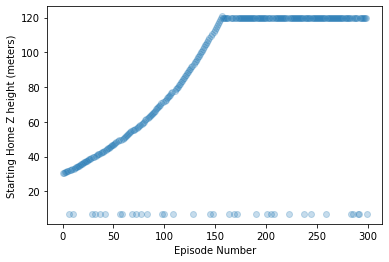

In [14]:
plt.plot(i_lst, Z_lst, 'o', alpha=0.25,)
plt.xlabel('Episode Number')
plt.ylabel('Starting Home Z height (meters)')
plt.show()

### Honey I'm home, x=0.0 y=0.0 z-5.0

action, reward, info:

* 6 -14.90  Height Penalty: -14.9 Z: 7.3(m), Distance From Home: 3.2 (m),
* 6 -5.71  Height Penalty: -5.7 Z: 13.3(m), Distance From Home: 9.2 (m),
* 6 -2.69  Height Penalty: -2.7 Z: 19.4(m), Distance From Home: 15.3 (m),
* 6 -1.43  Height Penalty: -1.4 Z: 25.4(m), Distance From Home: 21.3 (m),
* 0 -1.29  Height Penalty: -1.3 Z: 26.4(m), Distance From Home: 21.5 (m),
* 3 -2.20  Height Penalty: -2.2 Z: 21.2(m), Distance From Home: 15.6 (m),
* 6 -1.39  Height Penalty: -1.4 Z: 25.7(m), Distance From Home: 21.6 (m),
* 2 -1.27  Height Penalty: -1.3 Z: 26.6(m), Distance From Home: 22.7 (m),
* 2 -1.54  Height Penalty: -1.5 Z: 24.6(m), Distance From Home: 25.0 (m),
* 6 -0.92  Height Penalty: -0.9 Z: 31.6(m), Distance From Home: 30.5 (m),
* 2 -0.98  Height Penalty: -1.0 Z: 32.3(m), Distance From Home: 33.2 (m),
* 2 -1.01  Height Penalty: -1.0 Z: 32.7(m), Distance From Home: 36.8 (m),
* 2 -1.02  Height Penalty: -1.0 Z: 32.8(m), Distance From Home: 40.9 (m),
* 2 -1.00  Height Penalty: -1.0 Z: 32.5(m), Distance From Home: 45.4 (m),
* 2 -1.03  Height Penalty: -1.0 Z: 32.8(m), Distance From Home: 50.1 (m),
* 2 -1.03  Height Penalty: -1.0 Z: 32.9(m), Distance From Home: 55.1 (m),

tic toc ... time is up (30 seconds)


### Honey I'm home, x=0.0 y=0.0 z-65.0
* 3 -7.88  Height Penalty: -7.9 Z: 60.3(m), Distance From Home: 4.9 (m),
* 3 -5.44  Height Penalty: -5.4 Z: 54.7(m), Distance From Home: 10.9 (m),
* 3 -3.60  Height Penalty: -3.6 Z: 48.8(m), Distance From Home: 16.8 (m),
* 3 -2.31  Height Penalty: -2.3 Z: 42.8(m), Distance From Home: 22.8 (m),
* 3 -1.45  Height Penalty: -1.4 Z: 36.9(m), Distance From Home: 28.7 (m),
* 3 -0.84  Height Penalty: -0.8 Z: 31.0(m), Distance From Home: 34.6 (m),
* 0 -0.92  Height Penalty: -0.9 Z: 30.0(m), Distance From Home: 34.9 (m),
* 2 -0.96  Height Penalty: -1.0 Z: 29.6(m), Distance From Home: 35.4 (m),
* 2 -1.03  Height Penalty: -1.0 Z: 28.8(m), Distance From Home: 36.8 (m),
* 2 -0.92  Height Penalty: -0.9 Z: 30.0(m), Distance From Home: 39.0 (m),
* 2 -0.92  Height Penalty: -0.9 Z: 30.1(m), Distance From Home: 41.9 (m),
* 2 -0.91  Height Penalty: -0.9 Z: 30.1(m), Distance From Home: 45.4 (m),
* 2 -0.92  Height Penalty: -0.9 Z: 30.1(m), Distance From Home: 49.4 (m),
* 2 -0.90  Height Penalty: -0.9 Z: 30.2(m), Distance From Home: 53.7 (m),
* 2 -0.90  Height Penalty: -0.9 Z: 30.3(m), Distance From Home: 58.3 (m),
* 2 -0.90  Height Penalty: -0.9 Z: 30.2(m), Distance From Home: 63.0 (m),

tic toc ... time is up (30 seconds)

In [15]:
df_road=pd.read_csv('data/intersection_positions.csv', header=None)
df_road.columns=['x','y','z']
df_road.loc[len(df_road)]=[0,0,0]

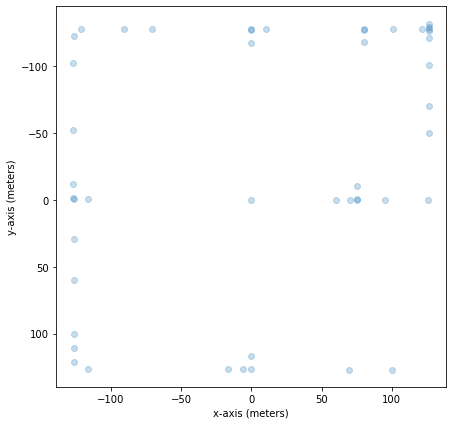

In [16]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
plt.plot(df_road['x'], df_road['y'], 'o', alpha=0.25,)
plt.xlabel('x-axis (meters)')
plt.ylabel('y-axis (meters)')
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

In [17]:
np.random.choice([5,75,40,20,30], p=[0.1,0.1, 0.3, 0.3,0.2])

5

# Neighborhood_DDQNAgent__Z-Reward_&_Road_Follow

In [18]:
df_road[(df_road['x'].between(50,101))&(df_road['y'].between(-20,0))]

,x,y,z
0,70.000000,0.000000,-7.336302
3,75.394096,-10.000000,-7.177466
4,75.393738,-0.320083,-7.063250


In [19]:

df_home=pd.DataFrame([[100,0], [75,-15], [0,-100], [0,100], [-100,0]], columns=['x','y'])
df_home

,x,y
0,100,0
1,75,-15
2,0,-100
3,0,100
4,-100,0


In [20]:
df_nofly=pd.DataFrame([[75,0, 20],[75,-40,20],[0,-75,20],[0,75,20],[-75,0, 20]], columns=['x','y','radius'])
df_nofly

,x,y,radius
0,75,0,20
1,75,-40,20
2,0,-75,20
3,0,75,20
4,-75,0,20


In [21]:
idx=df_home.sample().index[0]; idx
list(df_home.loc[idx])+[np.random.choice([5,75,40,20,30], p=[0.1,0.1, 0.3, 0.3,0.2])]

[-100, 0, 20]

In [22]:
[list(df_nofly.loc[idx])]

[[-75, 0, 20]]

In [23]:
df_summary=pd.read_csv('data/Neighborhood_DDQNAgent_Z_&_Road_Follow-Reward_w_BackTrack_Penalty35.csv')

In [24]:
df_summary[df_summary['Model Saved']==True].tail()

,Episode,Score,Average Score,Best Score,steps,Model Saved,Epsilon,Dropout,Vehicle Name
88,88,-369.209740,-1015.879489,-1399.470892,586,True,0.9890,0.001,Drone0
230,230,437.914609,-866.395339,-1015.879489,1962,True,0.3010,0.001,Drone0
231,231,405.459021,-854.558132,-866.395339,1972,True,0.2960,0.001,Drone0
244,244,32.158955,-194.856068,-854.558132,2102,True,0.2310,0.001,Drone0
245,245,45.574839,-140.251571,-194.856068,2111,True,0.2265,0.001,Drone0


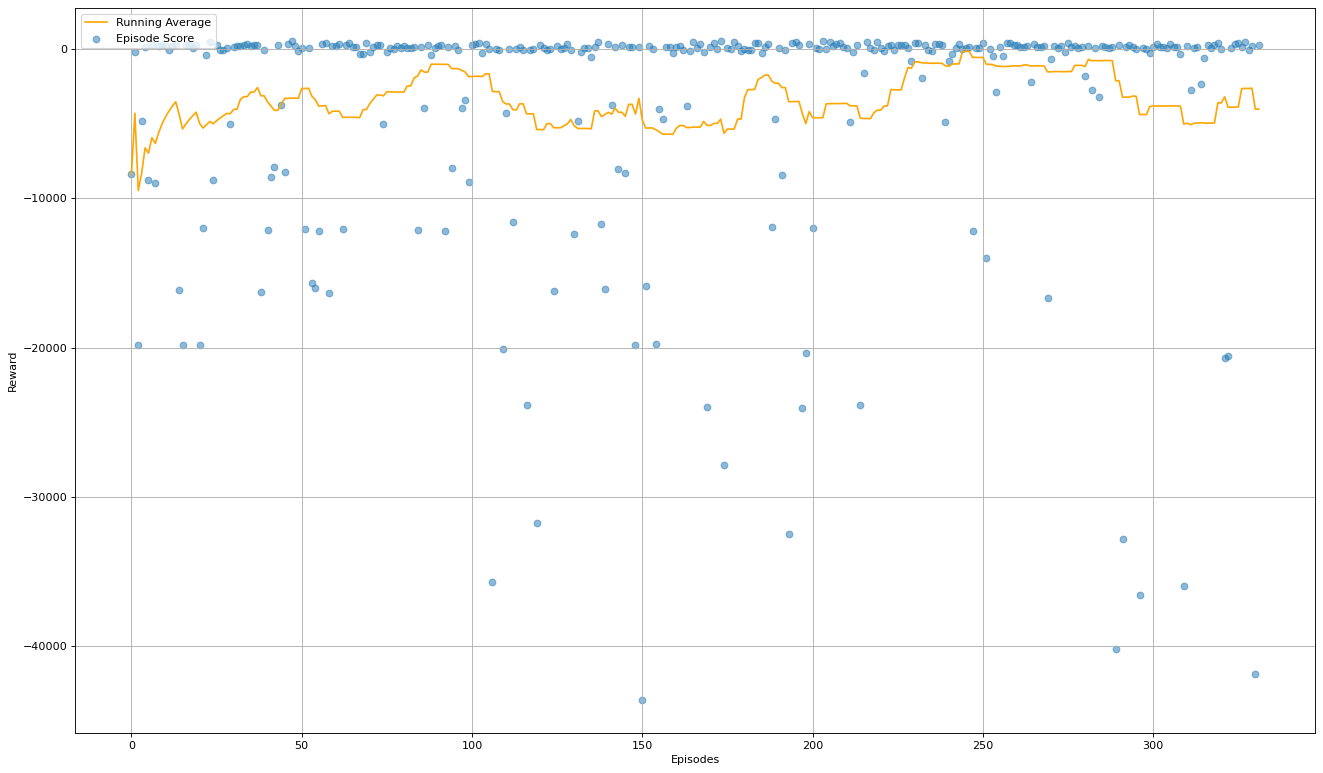

In [25]:
fig=plt.figure(figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
#filename = os.path.join(path, f'{filename}.png')
plt.scatter(df_summary['Episode'], df_summary['Score'], alpha=0.5, label='Episode Score')
plt.plot(df_summary['Episode'], df_summary['Average Score'], color='orange', label='Running Average')
plt.ylabel('Reward')
plt.xlabel('Episodes')
plt.legend(loc=2)

#plt.ylim(-1000,10)
plt.grid()


#plt.savefig(filename)
#if show: 
plt.show()

In [ ]:
100 episodes at position 1.  30 seconds. epislon 0.75 then
100 episodes at position 0. 35 seconds. epsilon 0.75 and learning rate lr=0.00001

In [ ]:
Honey I'm home, x=75.0 y=-15.0 z-20.0
1 59.81  Road Reward: 76.5, Height Penalty: -2.5 Z: 20.1(m), No Fly Zone Distance: 5.4, Distance From Home: 7.5 (m), Tue Mar 29, 22 at 19:04
4 37.22  Road Reward: 64.5, Height Penalty: -2.6 Z: 19.8(m), No Fly Zone Distance: 4.1, Distance From Home: 1.9 (m), Tue Mar 29, 22 at 19:04
6 44.11  Road Reward: 70.1, Height Penalty: -1.5 Z: 24.9(m), No Fly Zone Distance: 4.1, Distance From Home: 5.9 (m), Tue Mar 29, 22 at 19:04
2 77.26  Road Reward: 81.3, Height Penalty: -1.5 Z: 25.0(m), No Fly Zone Distance: 9.8, Distance From Home: 7.2 (m), Tue Mar 29, 22 at 19:04
1 75.17  Road Reward: 78.9, Height Penalty: -1.5 Z: 25.1(m), No Fly Zone Distance: 10.3, Distance From Home: 9.6 (m), Tue Mar 29, 22 at 19:04
2 84.42  Road Reward: 86.3, Height Penalty: -1.5 Z: 25.1(m), No Fly Zone Distance: 15.9, Distance From Home: 13.3 (m), Tue Mar 29, 22 at 19:04
6 74.91  Road Reward: 76.2, Height Penalty: -0.9 Z: 30.1(m), No Fly Zone Distance: 16.1, Distance From Home: 16.6 (m), Tue Mar 29, 22 at 19:04
2 53.97  Road Reward: 55.0, Height Penalty: -0.9 Z: 29.9(m), No Fly Zone Distance: 22.0, Distance From Home: 20.6 (m), Tue Mar 29, 22 at 19:04
5 76.23  Road Reward: 77.4, Height Penalty: -0.9 Z: 30.3(m), No Fly Zone Distance: 16.8, Distance From Home: 16.8 (m), Tue Mar 29, 22 at 19:04
tic toc ... time is up



In [ ]:
if action == 0: # rotate drone to see left and right
    self.quad_offset = (0, 0, 0)
    self.client.rotateToYawAsync(90, 1,2, vehicle_name=self.vehicle_name).join()
elif action == 1: self.quad_offset = (scale, 0, 0)
elif action == 2: self.quad_offset = (0, scale, 0)
elif action == 3: self.quad_offset = (0, 0, scale) # up
elif action == 4: self.quad_offset = (-scale, 0, 0)
elif action == 5: self.quad_offset = (0, -scale, 0)
elif action == 6: self.quad_offset = (0, 0, -scale)


In [ ]:
Honey I'm home, x=75.0 y=-15.0 z-15.0
1 67.37  Road Reward: 85.7, Height Penalty: -4.5 Z: 15.1(m), Backtrack Penalty: 0.0, No Fly Zone Distance: 5.5, Distance From Home: 7.5 (m),
1 31.17  Road Reward: 40.8, Height Penalty: -4.5 Z: 15.1(m), Backtrack Penalty: 0.0, No Fly Zone Distance: 8.0, Distance From Home: 13.4 (m),
1 -7.56  Road Reward: 0.5, Height Penalty: -6.4 Z: 12.5(m), Backtrack Penalty: 0.0, No Fly Zone Distance: 11.2, Distance From Home: 19.3 (m),
1 -5.46  Road Reward: 2.0, Height Penalty: -7.0 Z: 11.9(m), Backtrack Penalty: 0.0, No Fly Zone Distance: 15.1, Distance From Home: 25.2 (m),
1 -4.28  Road Reward: 2.5, Height Penalty: -6.7 Z: 12.2(m), Backtrack Penalty: 0.0, No Fly Zone Distance: 19.6, Distance From Home: 31.1 (m),
1 -1.65  Road Reward: 2.8, Height Penalty: -4.4 Z: 15.4(m), Backtrack Penalty: 0.0, No Fly Zone Distance: 24.4, Distance From Home: 37.0 (m),
2 41.98  Road Reward: 56.3, Height Penalty: -4.3 Z: 15.5(m), Backtrack Penalty: -10.0, No Fly Zone Distance: 28.6, Distance From Home: 38.5 (m),
1 64.86  Road Reward: 79.2, Height Penalty: -4.4 Z: 15.4(m), Backtrack Penalty: -10.0, No Fly Zone Distance: 33.4, Distance From Home: 44.3 (m),
1 75.34  Road Reward: 89.5, Height Penalty: -4.2 Z: 15.7(m), Backtrack Penalty: -10.0, No Fly Zone Distance: 37.9, Distance From Home: 50.0 (m),
1 70.43  Road Reward: 84.7, Height Penalty: -4.2 Z: 15.6(m), Backtrack Penalty: -10.0, No Fly Zone Distance: 43.2, Distance From Home: 55.8 (m),
1 35.96  Road Reward: 40.6, Height Penalty: -4.7 Z: 14.8(m), Backtrack Penalty: 0.0, No Fly Zone Distance: 48.3, Distance From Home: 61.7 (m),
2 9.25  Road Reward: 23.5, Height Penalty: -4.2 Z: 15.6(m), Backtrack Penalty: -10.0, No Fly Zone Distance: 52.1, Distance From Home: 63.7 (m),
2 45.76  Road Reward: 60.2, Height Penalty: -4.5 Z: 15.2(m), Backtrack Penalty: -10.0, No Fly Zone Distance: 54.4, Distance From Home: 64.1 (m),
2 10.62  Road Reward: 25.2, Height Penalty: -4.6 Z: 15.0(m), Backtrack Penalty: -10.0, No Fly Zone Distance: 58.2, Distance From Home: 66.3 (m),
2 -23.15  Road Reward: 14.8, Height Penalty: -38.0 Z: 3.1(m), Backtrack Penalty: 0.0, No Fly Zone Distance: 61.7, Distance From Home: 68.2 (m),
2 21.61  Road Reward: 29.1, Height Penalty: -7.5 Z: 11.4(m), Backtrack Penalty: 0.0, No Fly Zone Distance: 65.8, Distance From Home: 71.0 (m),
2 38.95  Road Reward: 43.1, Height Penalty: -4.2 Z: 15.8(m), Backtrack Penalty: 0.0, No Fly Zone Distance: 69.9, Distance From Home: 74.0 (m),
1 -14.15  Road Reward: 0.2, Height Penalty: -4.4 Z: 15.4(m), Backtrack Penalty: -10.0, No Fly Zone Distance: 74.8, Distance From Home: 79.4 (m),
tic toc ... time is up
Finished at Wed Mar 30, 22 at 18:24



In [19]:
# start at 85(m) z drone failed to drop to correct height
# Neighborhood_DDQNAgent_Just_Z-Reward_Low&High&ReallyHigh

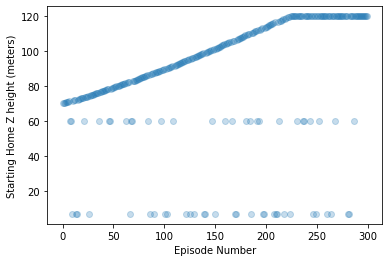

In [18]:
i_lst=[]
Z_lst=[]
max_z=120; Z=70; Z_dec=1.003
for episode in range(300):
    high=np.random.choice([0,1,2], p=[0.1,0.1, 0.8])
    if high==2:
        if Z<max_z: Z=Z*Z_dec
        else: Z=max_z
        Z_lst.append(Z)
    elif high==1: Z_lst.append(60)
    else: Z_lst.append(7)
    i_lst.append(episode)
    
plt.plot(i_lst, Z_lst, 'o', alpha=0.25,)
plt.xlabel('Episode Number')
plt.ylabel('Starting Home Z height (meters)')
plt.show()

In [ ]:
# add test results here:

In [ ]:
Honey I'm home, x=0.0 y=0.0 z-85.0

action, total reward, info:

* 3 -26.46  Height Penalty: -26.5 Z: 80.6(m), Distance From Home: 4.7 (m),
* 3 -19.13  Height Penalty: -19.1 Z: 74.9(m), Distance From Home: 10.6 (m),
* 3 -13.24  Height Penalty: -13.2 Z: 68.7(m), Distance From Home: 16.5 (m),
* 3 -9.35  Height Penalty: -9.3 Z: 63.0(m), Distance From Home: 22.5 (m),
* 3 -6.40  Height Penalty: -6.4 Z: 57.2(m), Distance From Home: 28.5 (m),
* 3 -4.25  Height Penalty: -4.2 Z: 51.1(m), Distance From Home: 34.5 (m),
* 3 -2.77  Height Penalty: -2.8 Z: 45.2(m), Distance From Home: 40.4 (m),
* 3 -1.74  Height Penalty: -1.7 Z: 39.2(m), Distance From Home: 46.5 (m),
* 3 -1.06  Height Penalty: -1.1 Z: 33.2(m), Distance From Home: 52.4 (m),
* 3 -1.18  Height Penalty: -1.2 Z: 27.4(m), Distance From Home: 58.3 (m),
* 3 -2.14  Height Penalty: -2.1 Z: 21.5(m), Distance From Home: 64.2 (m),
* 6 -1.36  Height Penalty: -1.4 Z: 25.9(m), Distance From Home: 58.1 (m),
* 6 -0.95  Height Penalty: -1.0 Z: 32.0(m), Distance From Home: 52.1 (m),
* 3 -1.15  Height Penalty: -1.2 Z: 27.6(m), Distance From Home: 58.1 (m),
* 3 -2.12  Height Penalty: -2.1 Z: 21.6(m), Distance From Home: 64.1 (m),
* 6 -1.34  Height Penalty: -1.3 Z: 26.1(m), Distance From Home: 58.0 (m),
* 2 -1.22  Height Penalty: -1.2 Z: 27.0(m), Distance From Home: 58.1 (m),
* 2 -1.50  Height Penalty: -1.5 Z: 24.9(m), Distance From Home: 58.9 (m),
            
tic toc ... time is up